
# Обратные связи в контуре управления

Для рассмотренных в предыдущих лекциях регуляторов требуется оценивать состояние объекта управления. Для построения таких оценок  необходимо реализовать обратные связи в контуре управления. На практике для этого используются специальные устройства: датчики.

# Случайные величины

Случайная величина -- это переменная, значениее которой определяется в результате эксперимента, подверженного влиянию случайных факторов. Случайные величины характеризуются функция плотности вероятности
\begin{equation}
p(a \leq \xi \leq b) = \int_{a}^{b} p(\xi) \,d\xi
\end{equation}
которая определяет вероятность попадания значения $\xi$ в интервал $[a \quad b]$.

Математическим ожиданием случайной величины называется 
\begin{equation}
\mathbb{E}[\xi] = \int_{-\infty}^{\infty} \xi \cdot p(\xi) \,d\xi
\end{equation}

Дисперсия случайной величины
\begin{equation}
\mathbb{D}[\xi] = \mathbb{E}[\left(\xi - \mathbb{E}[\xi]\right)^2]
\end{equation}

Ковариация двух случайных величин
\begin{equation}
    \Sigma[\xi_1, \xi_2] = \mathbb{E}[(\xi_1 - \mathbb{E}[\xi_1]) (\xi_2 - \mathbb{E}[\xi_2])]
\end{equation}

In [1]:
# [ПРИМЕР 1] Измерения случайной величины
import numpy as np

xi = np.random.random()
print(xi)

0.030119762146224804


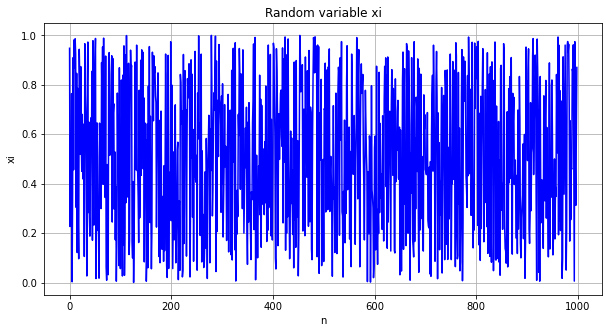

In [2]:
# [ПРИМЕР 2] Распределение случайной величины
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(200)
N = 999
xi = np.random.random(N)

# plot xi
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,1,1)

ax1.set_title("Random variable xi")
ax1.plot(range(N), xi, color = 'b')
ax1.set_ylabel(r'xi')
ax1.set_xlabel(r'n')
ax1.grid(True)

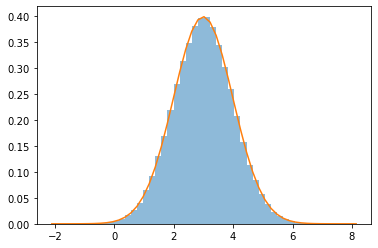

In [3]:
# [ПРИМЕР 3] Нормальное распределение
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

import numpy as np
x = np.random.normal(3, 1, 100000)

_, bins, _ = plt.hist(x, 50, density = True, alpha = 0.5)

mu, sigma = st.norm.fit(x)
best_fit_line = st.norm.pdf(bins, mu, sigma)

plt.plot(bins, best_fit_line)

Expected value:  0.04443358006592432
Variance:  1.0092073745363526


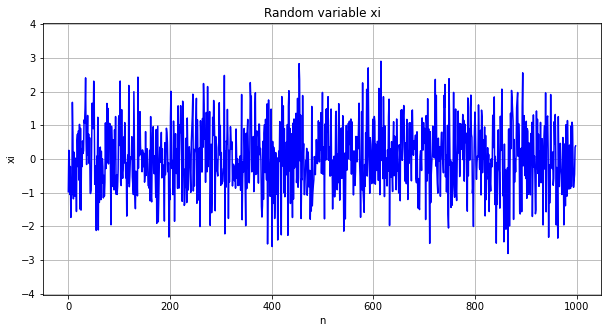

In [4]:
# [ПРИМЕР 4] Математическое ожидание и дисперсия
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(200)
N = 999
xi = np.random.normal(0, 1, N)
e = np.mean(xi)
print("Expected value: ", (e))
d = np.mean((xi - e)**2)
print("Variance: ", (d))

# plot xi
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,1,1)

ax1.set_title("Random variable xi")
ax1.plot(range(N), xi, color = 'b')
ax1.set_ylabel(r'xi')
ax1.set_xlabel(r'n')
ax1.set_ylim([-4 * d, 4 * d])
ax1.grid(True)

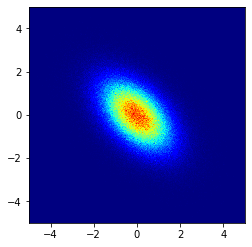

In [5]:
mean = [0, 0]
covariance_mat = [[1., -0.5], [-0.5, 1.]] 
x, y = np.random.multivariate_normal(mean, covariance_mat, 10000000).T

plt.figure(figsize = (3, 3 ))
plt.hist2d(x, y, bins=(1000, 1000), cmap = plt.cm.jet)
plt.subplots_adjust(bottom = 0, top = 1, left = 0, right = 1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

# Фильтр Калмана (Линейные системы)

Модель системы (процесса):
$$x_k = A_k \cdot x_{k-1} + B_k \cdot u_k + w_k,$$

где $w_k$~$N(0, Q_k)$ - нормально распределённый случайный процесс, характеризующийся нулевым математическим ожиданием и матрицей ковариации $Q_k$.

Модель наблюдений (измерений):
$$y_k = H_k \cdot x_k + v_k,$$

где $v_k$ - нормально распределённый случайный процесс, характеризующийся нулевым математическим ожиданием и матрицей ковариации $R_k$.

Требуется получить оценку вектора состояния системы $\hat{x}_k$, зная аналогичную оценку на предыдущем шаге ($\hat{x}_{k-1}$), выход системы (вектор измерений) $y_k$ и вектор управляющих параметров $u_k$.

## Прогноз

Прогноз (экстраполяция) вектора состояния с помощью модели процесса:
$$\overline{x}_k = A_k \cdot \hat{x}_{k-1} + B_k \cdot u_k ,$$

Прогноз матрицы ковариации ошибок:
$$\overline{P}_k = A_k\cdot \hat{P}_{k-1}\cdot A_k^T + Q_k$$


## Коррекция

Вычисление коэффициента усиления Калмана:
$$K_k = \overline{P}_k \cdot H_{k}^T \cdot \left(H_k\cdot \overline{P}_k\cdot H_k^T + R_k\right)^{-1}$$

Оценка матрицы ковариации ошибки:
$$\hat{P}_k = \left(I - K_k\cdot H_k\right)\cdot \overline{P}_k$$

Оценка вектора состояния:
$$\hat{x}_k = \overline{x}_k + K_k\cdot\left(y_k - H_k\cdot\overline{x}_k\right)$$

# Пример

Рассмотрим задачу о движении точки по прямой под действием случайных (постоянных внутри каждого такта управления) ускорений.

Вектор состояния системы включает в себя координату $x$ и скорость $v$, то есть $x_k = [x \quad v]^T$. Уравнения движения:

$$x_k = A_k \cdot x_{k-1} + G_k \cdot a_k,$$
где
$$A_k = 
\begin{pmatrix}
1 & \Delta t \\
0 & 1
\end{pmatrix}, \quad
G_k = \begin{pmatrix}
0.5 \Delta t^2 \\
\Delta t
\end{pmatrix}.
$$

Матрица ковариации шума процесса:
$$Q = G\cdot G^T \cdot \sigma_a^2,$$
где $\sigma_a$ характеризует случайное распределение ускорений.

На каждом такте процесса измеряется координата точки. Таким образом, матрица наблюдения
$$H = 
\begin{pmatrix}
1 & 0 
\end{pmatrix},$$

а модель наблюдений
$$y_k = H \cdot x_k + v_k,$$

где $v_k$ - нормально распределённый шум измерений ($\sigma_m$). Матрица ковариации шума измерений:
$R = \left[ \sigma_m^2 \right].$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import normalvariate

class RealWorld:
    def __init__(self, sigma_acc, sigma_meas, dt):
        self.time = 0.0
        self.time_step = dt        
        self.position = 0.0
        self.sigma_acc = sigma_acc
        self.velocity = 0.1
        self.measurement = None

        # шум измерений
        self.sigma_meas = sigma_meas

    def measure(self):
        if self.measurement == None:
            self.measurement = self.position + normalvariate(0, self.sigma_meas)
        
        return self.measurement

    def step(self):
        self.time += self.time_step
        acceleration = normalvariate(0, self.sigma_acc)
        self.position += self.velocity * self.time_step + 0.5 * acceleration * self.time_step**2
        self.velocity += acceleration * self.time_step

        self.measurement = None   

# Пример

Рассмотрим задачу о движении точки по прямой под действием случайных (постоянных внутри каждого такта управления) ускорений.

Вектор состояния системы включает в себя координату $x$ и скорость $v$, то есть $x_k = [x \quad v]^T$. Уравнения движения:

$$x_k = A_k \cdot x_{k-1} + G_k \cdot a_k,$$
где
$$A_k = 
\begin{pmatrix}
1 & \Delta t \\
0 & 1
\end{pmatrix}, \quad
G_k = \begin{pmatrix}
0.5 \Delta t^2 \\
\Delta t
\end{pmatrix}.
$$

Матрица ковариации шума процесса:
$$Q = G\cdot G^T \cdot \sigma_a^2,$$
где $\sigma_a$ характеризует случайное распределение ускорений.

На каждом такте процесса измеряется координата точки. Таким образом, матрица наблюдения
$$H = 
\begin{pmatrix}
1 & 0 
\end{pmatrix},$$

а модель наблюдений
$$y_k = H \cdot x_k + v_k,$$

где $v_k$ - нормально распределённый шум измерений ($\sigma_m$). Матрица ковариации шума измерений:
$R = \left[ \sigma_m^2 \right].$

In [7]:
sigma_a = 0.01 # нормально распределённые ускорения

# дисперсия шума измерений
sigma_measurement = 10.

world = RealWorld(sigma_a, sigma_measurement, 0.5)

#оператор эволюции
A = np.array([[1., world.time_step],[0., 1.]])
G = np.array([0.5 * world.time_step**2, world.time_step])

# шум процесса
Q = np.outer(G, G) * sigma_a**2

# матрица ковариации ошибки
position_uncertainty = 1.
velocity_uncertainty = 1. 
P = np.array([[position_uncertainty, 0.],[0., velocity_uncertainty]])

#модель наблюдений, измеряем только положение
H = np.array([1., 0.])  

# дисперсия шума измерений
R = np.array([sigma_measurement**2]) 

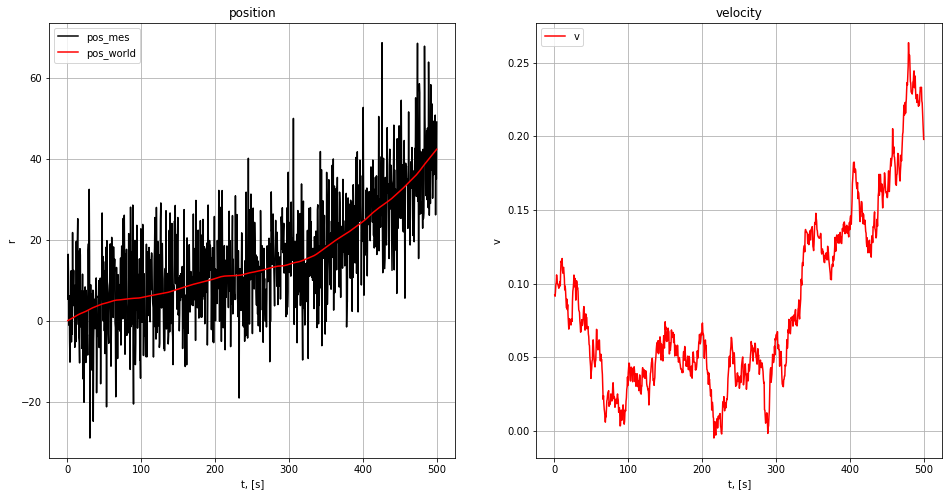

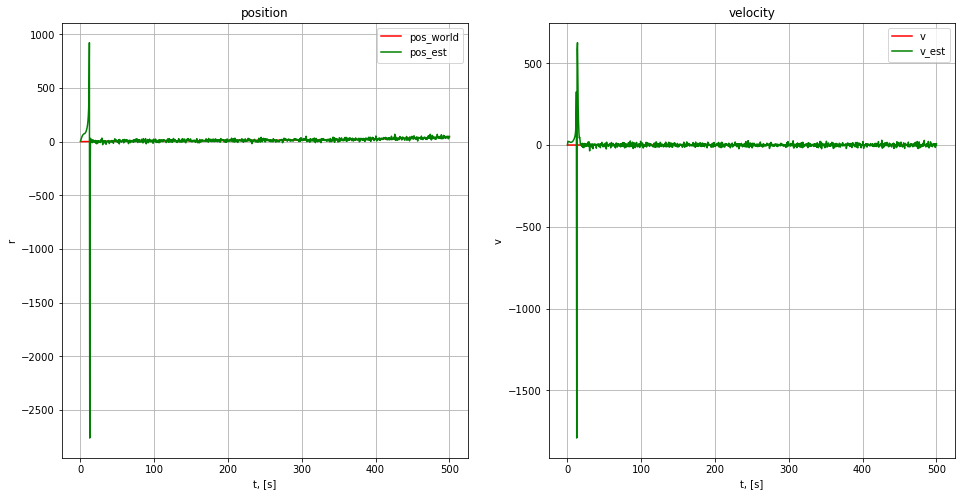

In [8]:
episode_len = 1000
data = np.zeros((6, episode_len))

for i in range(episode_len):
    world.step()
    measurement = world.measure()

    if i == 0: # первое измерение
        x_est = np.array([measurement, 0.])       
    elif i == 1: # второе измерение
        x_est = np.array([measurement, ( measurement - data[4, i-1] ) / world.time_step])
    else: # если i >=2 начинаем применять модель
        ##################################################################
        # прогноз
        vel_est = data[5, i-1]
        pos_est = data[4, i-1] + vel_est * world.time_step
        x_pred = np.array([pos_est, vel_est])

        # прогноз матрицы ковариации ошибки
        P_pred = A.dot(P).dot(A.T) + Q
      
        ##################################################################       
        # Коррекция
        K = P_pred.dot(H.T) / (H.dot(P_pred).dot(H.T) + R)
        P = (np.eye(2) - K.dot(H)).dot(P_pred)
        
        x_est = x_pred + K.dot(measurement - H.dot(x_pred))
    
    data[:, i] = np.array([world.time, world.position, world.velocity, measurement, x_est[0], x_est[1]])
        

# plot
fig1 = plt.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

# r
ax1.set_title("position")
ax1.plot(data[0, :], data[3, :], 'k', label = 'pos_mes')
ax1.plot(data[0, :], data[1, :], 'r', label = 'pos_world')
#ax1.plot(data[0, :], data[4, :]-data[1, :], 'g', label = 'pos_est')

ax1.set_ylabel(r'r')
ax1.set_xlabel(r't, [s]')
ax1.grid(True)
ax1.legend()

# v
ax2.set_title("velocity")
ax2.plot(data[0, :], data[2, :], 'r', label = 'v')
#ax2.plot(data[0, :], data[5, :], 'g', label = 'v_est')

ax2.set_ylabel(r'v')
ax2.set_xlabel(r't, [s]')
ax2.grid(True)
ax2.legend()

fig2 = plt.figure(figsize=(16,8))
ax3 = fig2.add_subplot(1,2,1)
ax4 = fig2.add_subplot(1,2,2)

# r
ax3.set_title("position")
ax3.plot(data[0, :], data[1, :], 'r', label = 'pos_world')
ax3.plot(data[0, :], data[4, :], 'g', label = 'pos_est')

ax3.set_ylabel(r'r')
ax3.set_xlabel(r't, [s]')
ax3.grid(True)
ax3.legend()

# v
ax4.set_title("velocity")
ax4.plot(data[0, :], data[2, :], 'r', label = 'v')
ax4.plot(data[0, :], data[5, :], 'g', label = 'v_est')

ax4.set_ylabel(r'v')
ax4.set_xlabel(r't, [s]')
ax4.grid(True)
ax4.legend()

# Модель измерений
Рассмотрим движение системы
\begin{equation}
\dot{x} = f(x).
\end{equation}

Вектор измерений $z$ зависит от состояния системы, а также содержит случайную компоненту
\begin{equation}
z(x) = h(x) + \xi.
\end{equation}
Функция $h(x)$ связывает состояние системы с измерением датчика.

Например,
если датчик GNNS-приемника в одномерной задаче движения тележки по рельсам
смещен от центра тележки $x$ на расстояние $r$,
можно записать
\begin{equation}
h(x) = x + r.
\end{equation}

# Расширенный фильтр Калмана (Extended Kalman Filter)

Расширенный фильтр Калмана подразумевает, как правило, нелиинейную модель системы (процесса):

\begin{equation}
\dot{x} = f(x) + w(t).
\end{equation}

Шум $w$ имеет нормальное распределение, нулевое математическое ожидание и матрицу ковариации $Q$.

Модель наблюдений также может описываться нелинейным уравнением
\begin{equation}
y = h(x) + v(t),
\end{equation}
где $v$ имеет нормальное распределение, нулевое математическое ожидание и матрицу ковариации $R$. Однако, как правило, считается, что измерения обрабатываются фильтром периодически с частотой такта управления, поэтому модель записывают в видее соотношенийми между вектором состояния на момент получения измерений $x_k = x(t_k)$ и набором измерений $y_k = y(t_k)$:
\begin{equation}
y_k = h(x_k) + v_k.
\end{equation}

Алгоритм снова выполняется в два этапа - прогноз и коррекция.

## Прогноз

Прогноз (экстраполяция) вектора состояния с помощью нелинейной модели процесса:
$$\overline{x}_k = \hat{x}_{k-1} + \int_{t_{k-1}}^{t_k} f(x)dt,$$

Прогноз матрицы ковариации ошибок:
\begin{equation}
\overline{P}_k = \Phi_k \cdot \hat{P}_{k-1} \cdot \Phi_k^T + Q,
\end{equation}
где
\begin{equation}
\Phi_k = I + F\cdot \Delta t = I +\frac{\partial f(x)}{\partial x}\cdot(t_k -t_{k-1})
\end{equation}


## Коррекция

Здесь отличие от линейного алгоритма в необходимости линеаризовать модель наблюдений, чтобы получить матрицу $H$:
\begin{equation}
H_k = \frac{\partial h(x}{\partial x}.
\end{equation}

Вычисление коэффициента усиления Калмана:
$$K_k = \overline{P}_k \cdot H_{k}^T \cdot \left(H_k\cdot \overline{P}_k\cdot H_k^T + R_k\right)^{-1}$$

Оценка матрицы ковариации ошибки:
$$\hat{P}_k = \left(I - K_k\cdot H_k\right)\cdot \overline{P}_k$$

Оценка вектора состояния:
$$\hat{x}_k = \overline{x}_k + K_k\cdot\left(y_k - h(\overline{x}_k)\right)$$


# Пример: Вращение твёрдого тела с неподвижным центром масс

Ориентация твердого тела описывается кватернионом $q$, задающим положение связанной с телом системы координат относительно некоторой неподвижной системы координат. Говорят, что кватернион $q^{\mathrm{BI}}$ задает ориентацию некоторого базиса (B) относительно некоторого другого базиса (I), если представление любого вектора $\mathbf{v}$ в этих системах координат определяется соотношением:
$$\mathbf{v}^{\mathrm{B}} = q^{\mathrm{BI}}\circ\mathbf{v}^{\mathrm{I}}\circ \tilde{q}^{\mathrm{BI}}$$

Кинематические уравнения твердого тела записываются как:

\begin{equation}\label{eq:quat}\tag{1}
\dot{q} = \frac{1}{2}q\circ \boldsymbol{\omega},
\end{equation}

где $q$ - кватернион ориентации тела, $\boldsymbol{\omega}$ - угловая скорость тела в рпоекциях на связанные с телом оси.

Модель движения твёрдого тела с неодвижной точкой дополняется динамическими уравнениями Эйлера

\begin{equation}\label{eq:euler}\tag{2}
\mathbf{J}\cdot \dot{\boldsymbol{\omega}} + \boldsymbol{\omega} \times \mathbf{J}\cdot \boldsymbol{\omega} = \mathbf{T},
\end{equation}

где $\mathbf{J}$ - тензор инерции тела, $\mathbf{T}$ - главный момнет сил, действующих на тело.

Таким образом, вектор состояния состояит из 4х компонент кватерниона ориентации и 3х компонент вектора угловой скорости. А модель процесса состоит из уравнений \eqref{eq:quat} и \eqref{eq:euler}.